## 3D Animation

This is harder than we would like to do in a workshop. But, just for fun, let's do a 3D animation.

We will draw a torus that deforms into a knot.

Let try to animate. We start with the parameterization of a circle, of radius 2:

$$x=2\sin u$$
$$y=2\cos u$$
$$z = 0$$

and want to interpolate it to the equation for a knot:

$$x=\sin u+2\sin 2u$$
$$y=\cos u-2\cos 2u$$
$$z = -\sin 3u.$$

A linear interpolation between the two would look something like 
$$x = a*x_{torus} + (1-a)*x_{knot},$$
and similar for the other components.

To get a surface, we draw a little circle around each point on the curve, parameterized by a second variable $v$:
$$x_{vec}=\sin u \cos v$$
$$y_{vec}=\cos u \cos v$$
$$z_{vec}=\sin v $$

We can scale this vector by some small parameter $r$ to get the proper thickness for the torus/knot.

First, we load in the packages we need. 

In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

Then, we set up the parameterizations for the torus and the knot, using a meshgrid from u,v.

(-1.4, 1.4)

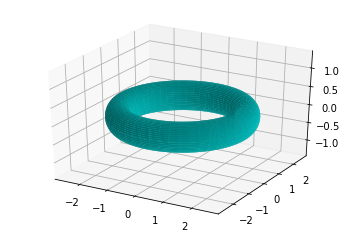

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig = figure()
ax = axes(projection='3d')

# we need to fix some parameters, describing size of the inner radus of the torus/knot
r = .4

# We set the parameterization for the circle and the knot
u = linspace(0, 2*pi, 100)
v = linspace(0, 2*pi, 100)
u,v = meshgrid(u,v)
x_torus = 2*sin(u) + r*sin(u)*cos(v)
y_torus = 2*cos(u) + r*cos(u)*cos(v)
z_torus = r*sin(v)
x_knot =   sin(u) + 2*sin(2*u) + r*sin(u)*cos(v)
y_knot =   cos(u) - 2*cos(2*u) + r*cos(u)*cos(v)
z_knot = -sin(3*u) + r*sin(v)

ax.plot_surface(x_torus, y_torus, z_torus, color='c')
ax.set_xlim([-2*(1+r), 2*(1+r)])
ax.set_ylim([-2*(1+r), 2*(1+r)])
ax.set_zlim([-(1+r), (1+r)])


We need an initialization function, an animation function, and then we call the animator to put it all together.

In [3]:
# initialization function: plot the background of each frame
def init():
    thingy = ax.plot_surface([0], [0], [0], color='c')
    return (thingy,)

In [4]:
# animation function. This is called sequentially
def animate(i):
    a = sin(pi*i/100)**2  # this is an interpolation parameter. a = 0 is torus, a=1 is knot
    x = (1-a)*x_torus + a*x_knot
    y = (1-a)*y_torus + a*y_knot
    z = (1-a)*z_torus + a*z_knot
    ax.clear()
    ax.set_xlim([-2*(1+r), 2*(1+r)])
    ax.set_ylim([-2*(1+r), 2*(1+r)])
    ax.set_zlim([-(1+r), (1+r)])
    thingy = ax.plot_surface(x, y, z, color='c')
    return (thingy,)

In [5]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

Finally, we call the HMML code to conver the animation object into a video. (This depends on having a MovieWriter installed on your system. Should be fine on syzygy.ca but it does not work on my Mac unless I install ffmpeg.)

In [6]:
HTML(anim.to_html5_video())

If you click on the image above, you will see there is a button that allows you to download the animation as an mp4 file directly. Or you can use the following command:

In [7]:
anim.save('knot.mp4')

In [8]:
2+2

4